Import packages

In [2]:
import numpy as np
import quantecon as qe
import matplotlib.pyplot as plt
import time
from scipy.optimize import minimize_scalar
from scipy import interpolate

Create grids

In [3]:
def create_grids(n, alpha, beta, delta, A):

    zero_grid=np.linspace(0, 1, n).reshape(-1,1)

    k_grid_1=np.zeros(shape=(n,1))

    k_grid_2=np.zeros(shape=(n,1))

    k_grid_3=np.zeros(shape=(n,1))

    k_grid_4=np.zeros(shape=(n,1))

    k_ss  = (( alpha * beta * A) / (1 - beta * (1 - delta)))** (1/(1 - alpha))
    
    #for i in range(len(new_grid)):
        #k_grid[i] =  low_bound + ( up_bound - low_bound ) * (new_grid[i] ** 1)

    for i in range(len(zero_grid)):
        k_grid_1[i] =  (0.75 * k_ss) + ( (1.25 * k_ss) - (0.75 * k_ss) ) * (zero_grid[i] ** 1)

    for i in range(len(zero_grid)):
        k_grid_2[i] =  (0.75 * k_ss) + ( (1.25 * k_ss) - (0.75 * k_ss) ) * (zero_grid[i] ** 1.5)

    for i in range(len(zero_grid)):
        k_grid_3[i] =  (0.75 * k_ss) + ( (1.25 * k_ss) - (0.75 * k_ss) ) * (zero_grid[i] ** 3)

    for i in range(len(zero_grid)):
        k_grid_4[i] =  (0.75 * k_ss) + ( (1.25 * k_ss) - (0.75 * k_ss) ) * (zero_grid[i] ** 4)

    return k_grid_1, k_grid_2, k_grid_3, k_grid_4

Utility

In [90]:
def u(c, gamma):
    if gamma == 1:
        return np.log(c)
    if gamma < 1:
        return ((c ** (1 - gamma))/( 1 - gamma))
    if gamma > 1:
        return - ((gamma - 1) / (c ** (gamma - 1)))

In [56]:
def u_new(c,gamma, beta):
    return (1 - beta) * (c) ** (1-gamma)

Production

In [6]:
def f(A, alpha, delta, k):
    return A * (k ** alpha) + (1 - delta) * k

# First, let us use VFI with a discrete grid as a review

In [7]:
def Tv(v, k, delta, toler, max_iter, alpha, A, beta, n, gamma):
    start_time = time.time()
    iter = 1
    error = toler+1
    v1=np.zeros(shape=(n,1))
    policy=np.zeros(shape=(n,1))
    while (toler<error) and (iter<max_iter):
        distance=np.zeros(shape=(n,1)) 
        for i in range(len(k)):
            vmax = -np.inf
            for j in range(len(k)): 
                c = f(A, alpha, delta, k[i]) - k[j] 
                if c>=0: 
                    v_temp = u(c, gamma)+beta*v[j]
                    if v_temp>vmax: 
                        vmax=v_temp 
                        policy_i=k[j]
                v1[i]=vmax 
                policy[i]=policy_i 
                distance[i]=np.abs(vmax-v[i]) 
        error=np.max(distance)       
        v=np.copy(v1) 
        if iter == 1:
            print(f"Iteration {iter}, Max Error: {error}") 
        if iter % 10 == 0:
            print(f"Iteration {iter}, Max Error: {error}") 
        iter+=1
    if iter == max_iter:
        print("Failed to converge in max_iter iterations") 
    end_time = time.time() 
    execution_time = end_time - start_time 
    print(f"Execution time: {execution_time} seconds")
    return v, policy 

In [8]:
delta_values = [0.1,1]

Solve


iterating for delta = 0.1:
Iteration 1, Max Error: 0.03954985185889255
Iteration 10, Max Error: 0.015218534900998337
Iteration 20, Max Error: 0.00527995541380244
Iteration 30, Max Error: 0.0018375610177930324
Iteration 40, Max Error: 0.00064071790927267
Iteration 50, Max Error: 0.00022340452114932852
Iteration 60, Max Error: 7.786539836890372e-05
Iteration 70, Max Error: 2.714998564107285e-05
Iteration 80, Max Error: 9.46661464207299e-06
Execution time: 1.1980640888214111 seconds
Iteration 1, Max Error: 0.03954985185889255
Iteration 10, Max Error: 0.01522995604423577
Iteration 20, Max Error: 0.005277743510342936
Iteration 30, Max Error: 0.0018377301191322415
Iteration 40, Max Error: 0.0006407768712638484
Iteration 50, Max Error: 0.00022342507992445526
Iteration 60, Max Error: 7.790350834729898e-05
Iteration 70, Max Error: 2.7149497624223695e-05
Iteration 80, Max Error: 9.466444481132097e-06
Execution time: 1.1889047622680664 seconds
Iteration 1, Max Error: 0.03954985185889255
Iteratio

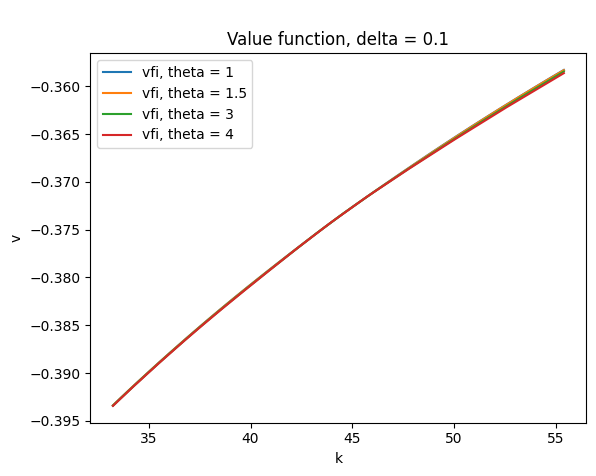

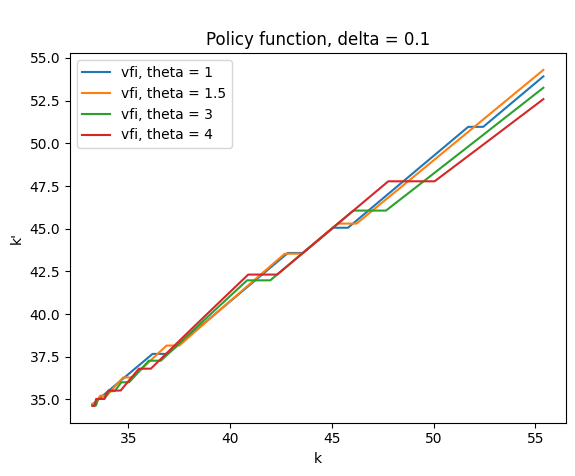


iterating for delta = 1:
Iteration 1, Max Error: 0.09139791889234186
Iteration 10, Max Error: 0.0350112078047915
Iteration 20, Max Error: 0.012207471636140554
Iteration 30, Max Error: 0.004256482167654507
Iteration 40, Max Error: 0.0014841435625313482
Iteration 50, Max Error: 0.0005174888622678786
Iteration 60, Max Error: 0.00018043720926474993
Iteration 70, Max Error: 6.291456466245293e-05
Iteration 80, Max Error: 2.1936952266154996e-05
Execution time: 1.3358080387115479 seconds
Iteration 1, Max Error: 0.09139791889234186
Iteration 10, Max Error: 0.035012723856293615
Iteration 20, Max Error: 0.012207485487332193
Iteration 30, Max Error: 0.004256486997266329
Iteration 40, Max Error: 0.001484145246512858
Iteration 50, Max Error: 0.0005174894494359705
Iteration 60, Max Error: 0.0001804374139975362
Iteration 70, Max Error: 6.291463604846115e-05
Iteration 80, Max Error: 2.1936977156800097e-05
Execution time: 1.3410122394561768 seconds
Iteration 1, Max Error: 0.09139791889234186
Iteration 

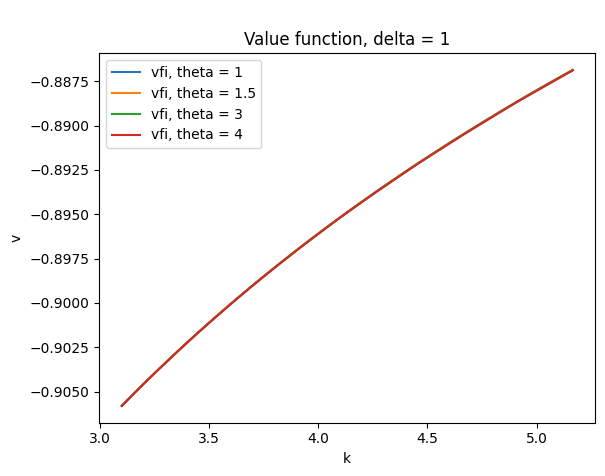

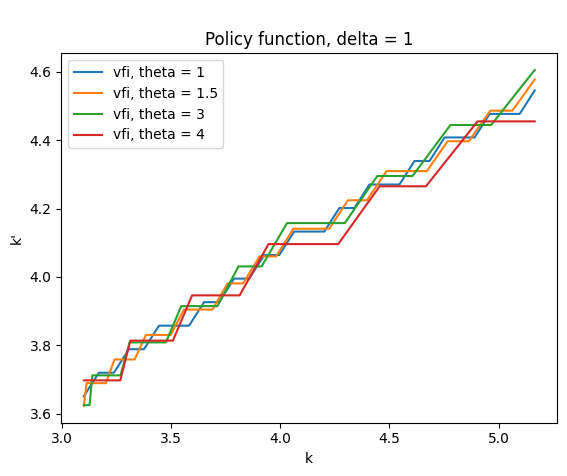

In [9]:
for delta in delta_values:
    if delta == 1:
        print(f"\niterating for delta = {delta}:")
        k_grid_1, k_grid_2, k_grid_3, k_grid_4 = create_grids(n=31, alpha=0.3, beta=0.9, delta=delta, A=10)  
        v_init = np.zeros(shape=(31,1))
        v_out_1, policy_out_1 = Tv(v_init, k_grid_1, delta, 1e-5, 10000, 0.3, 10, 0.9, 31, 2)
        v_out_2, policy_out_2 = Tv(v_init, k_grid_2, delta, 1e-5, 10000, 0.3, 10, 0.9, 31, 2)
        v_out_3, policy_out_3 = Tv(v_init, k_grid_3, delta, 1e-5, 10000, 0.3, 10, 0.9, 31, 2)
        v_out_4, policy_out_4 = Tv(v_init, k_grid_4, delta, 1e-5, 10000, 0.3, 10, 0.9, 31, 2)
        plt.plot(k_grid_1, v_out_1, label='vfi, theta = 1')
        plt.plot(k_grid_2, v_out_2, label='vfi, theta = 1.5')
        plt.plot(k_grid_3, v_out_3, label='vfi, theta = 3')
        plt.plot(k_grid_4, v_out_4, label='vfi, theta = 4')
        plt.title(f"\nValue function, delta = {delta}")
        plt.xlabel('k')
        plt.ylabel("v")
        plt.legend()
        plt.show()
        plt.plot(k_grid_1, policy_out_1, label='vfi, theta = 1')
        plt.plot(k_grid_2, policy_out_2, label='vfi, theta = 1.5')
        plt.plot(k_grid_3, policy_out_3, label='vfi, theta = 3')
        plt.plot(k_grid_4, policy_out_4, label='vfi, theta = 4')
        plt.title(f"\nPolicy function, delta = {delta}")
        plt.xlabel('k')
        plt.ylabel("k'")
        plt.legend()
        plt.show()
    else:
        print(f"\niterating for delta = {delta}:")
        k_grid_1, k_grid_2, k_grid_3, k_grid_4 = create_grids(n=31, alpha=0.3, beta=0.9, delta=delta, A=10)     
        v_init = np.zeros(shape=(31,1))
        v_out_1, policy_out_1 = Tv(v_init, k_grid_1, delta, 1e-5, 10000, 0.3, 10, 0.9, 31, 2)
        v_out_2, policy_out_2 = Tv(v_init, k_grid_2, delta, 1e-5, 10000, 0.3, 10, 0.9, 31, 2)
        v_out_3, policy_out_3 = Tv(v_init, k_grid_3, delta, 1e-5, 10000, 0.3, 10, 0.9, 31, 2)
        v_out_4, policy_out_4 = Tv(v_init, k_grid_4, delta, 1e-5, 10000, 0.3, 10, 0.9, 31, 2)
        plt.plot(k_grid_1, v_out_1, label='vfi, theta = 1')
        plt.plot(k_grid_2, v_out_2, label='vfi, theta = 1.5')
        plt.plot(k_grid_3, v_out_3, label='vfi, theta = 3')
        plt.plot(k_grid_4, v_out_4, label='vfi, theta = 4')
        plt.title(f"\nValue function, delta = {delta}")
        plt.xlabel('k')
        plt.ylabel("v")
        plt.legend()
        plt.show()
        plt.plot(k_grid_1, policy_out_1, label='vfi, theta = 1')
        plt.plot(k_grid_2, policy_out_2, label='vfi, theta = 1.5')
        plt.plot(k_grid_3, policy_out_3, label='vfi, theta = 3')
        plt.plot(k_grid_4, policy_out_4, label='vfi, theta = 4')
        plt.title(f"\nPolicy function, delta = {delta}")
        plt.xlabel('k')
        plt.ylabel("k'")
        plt.legend()
        plt.show()

# Now, we interpolate

Deal with the case of log utility first

In [91]:
def T(toler, max_iter, beta, gamma, alpha, delta, A, n):

    V = np.zeros(shape=(n,1))

    V_new = np.zeros(shape=(n,1))

    G_kp = np.zeros(shape=(n,1))

    k = create_grids(n, alpha, beta, delta, A)[0]

    iter = 1

    start_time = time.time()

    for iter in range(max_iter):

        for i, k_i in enumerate(k):

            def F(kp, k_i, V_interp):
            # Objective Function
            # Calculate consumption for each kp
                c = f(A, alpha, delta, k_i) - kp
                # Minimise the negative of the Bellman with interpolated v(kp)
                return -u(c, gamma) - beta * V_interp(kp)
        
        # Interpolate the value function

            V_interp = interpolate.interp1d(np.squeeze(k), np.squeeze(V) , kind = 'cubic', fill_value = 'extrapolate')

            k_min = 0.9 * np.min(k)

            k_max = f(A, alpha, delta, k[i])  + 1e-4

            # Derivative of the objective function at the lower bound

            dF_min = -1

            # Derivative of the objective function at the upper bound

            dF_max = 1

            # Check for corner solutions
            # If the derivative at kp at the lower bound is negative, it suggests that the objective function is decreasing as kp approaches the lower bound
            # This can happen if the policy implied by the objective function is to reduce kp further.
            # So, the algorithm sets kp_min to k_min, this implies that if the optimisation algorithm is in a situation
            # where it seems beneficial to reduce kp below k_min based on the objective function, the algorithm starts the search from k_min.
            # The idea is to handle scenarios where the objective function might suggest a corner solution at the lower bound. 
            # Setting kp_min to k_min provides a starting point for the optimisation algorithm.

            # While kp_min and kp_max are indeed set to k_min and k_max respectively, they are used as initial guesses for the minimisation algorithm. 
            # However, these initial guesses do not restrict the search space of the algorithm; 
            # the algorithm is still free to explore values within the bounds specified in the bounds parameter of minimize_scalar.

            kp_min = k_min if dF_min < 0 else None

            kp_max = k_max if dF_max > 0 else None

            # Since we pass args=(k_i, V_interp), minimize_scalar will search in the kp direction to minimise F.
            # That is, it will find consumption for each kp, and calculate the Bellman using V_interp(kp)
            # Result will be of type OptimizeResult
            # To find the value, we use -result.fun, and result.x is the optimal value of kp which minimises the objective function.
            # Minimise_scalar uses two-sided derivatives

            result = minimize_scalar(F, bounds=(kp_min, kp_max), args=(k_i, V_interp), method='bounded')

            G_kp[i] = result.x

            V_new[i] = -result.fun
        
        iter += 1

        error = np.abs(np.max(V_new - V))

        if iter == 1:
            print(f"Iteration {iter}, Max Error: {error}") 
        if iter % 25 == 0:
            print(f"Iteration {iter}, Max Error: {error}") 

        if np.max((V_new - V)) < toler:
            print(f"Converged in {iter} iterations")
            break

        V = np.copy(V_new)
    
    end_time = time.time() 
    execution_time = end_time - start_time 
    print(f"Execution time: {execution_time} seconds")

    # Plots

    a0 = (np.log(A) + (1 - alpha * beta) * np.log(1 - alpha * beta) + alpha * beta * np.log(alpha * beta)) / ((1 - beta) * (1 - alpha * beta))

    a1 = alpha / (1 - alpha * beta)

    plt.plot(k, a0 + a1 * np.log(k), label='exact')
    plt.plot(k, V_interp(k), label='vfi')
    plt.xlabel('k')
    plt.ylabel("v")
    plt.title("Value function")
    plt.legend()
    plt.show()

    plt.plot(k, A * alpha * beta * k ** alpha, label='exact')
    plt.plot(k, G_kp, label='vfi')
    plt.xlabel('k')
    plt.ylabel("v")
    plt.title("Policy function")
    plt.legend()
    plt.show()


    return V, G_kp            


ChatGPT provides an explanation of k_min, k_max, kp_min and kp_max.

Here's a step-by-step clarification:

1. **Search Space Bounds:** The `minimize_scalar` function is instructed to search within the specified bounds `(k_min, k_max)`.

2. **Initial Guesses:** The initial guesses for the minimum are provided by `kp_min` and `kp_max`. These values serve as starting points for the optimization algorithm.

3. **Objective Function Evaluation:** The algorithm begins by evaluating the objective function at the initial guesses, i.e., at `kp_min` and `kp_max`. This involves calculating the objective function value, consumption, and discounted future value at these points.

4. **Derivatives:** The algorithm also calculates the derivatives of the objective function at these points (`dF_min` and `dF_max`). These derivatives guide the direction of the search.

5. **Search Process:** The optimization algorithm then iteratively adjusts the variable `kp` within the specified bounds, evaluating the objective function at various points and considering the derivatives. The algorithm aims to find the minimum of the objective function within the defined search space.

6. **Convergence:** The search process continues until the algorithm converges to a minimum or reaches the maximum number of iterations specified.

In summary, the search space is defined by `(k_min, k_max)`, but the optimization algorithm starts its search at the points given by `kp_min` and `kp_max`. These initial guesses help guide the algorithm toward the correct direction in the search space, potentially improving the efficiency of finding the minimum. The actual search, however, occurs within the specified bounds.

Further, I then asked ChatGPT if `k_min = kp_min`, and `k_max = kp_max`, since the above code seemed to imply so.

You've identified an important point, and I appreciate your attention to detail. You are correct in noting that in the provided code:

```python
dF_min = -1
kp_min = k_min if dF_min < 0 else None
```

The condition `dF_min < 0` is always `True` because `dF_min` is set to `-1`. Therefore, the `else None` part of the statement is never executed. In this specific case, `kp_min` will always be equal to `k_min`.

So, to clarify, the purpose of the `else None` part is to provide a fallback condition in case you want to handle situations where the assumption about the derivative at the lower bound is not met. However, in your current implementation, this condition is not reached because `dF_min` is always negative.

If you want to be explicit about the conditions, you could simplify the code like this:

```python
dF_min = -1
kp_min = k_min if dF_min < 0 else k_max
```

This ensures that `kp_min` is set to `k_max` if, for some reason, you want a different behavior when the assumption about the derivative is not met. If you're confident that the assumption will always hold, you can keep the existing code for simplicity.

Iteration 1, Max Error: 2.7201197746645356
Iteration 25, Max Error: 0.724652534284651
Iteration 50, Max Error: 0.20101105714689282
Iteration 75, Max Error: 0.05575837133476824
Iteration 100, Max Error: 0.015466790822536325
Iteration 125, Max Error: 0.004290326503827657
Iteration 150, Max Error: 0.0011900918374863068
Iteration 175, Max Error: 0.0003301190667883702
Iteration 200, Max Error: 9.157158703487767e-05
Iteration 225, Max Error: 2.5401003476588357e-05
Iteration 250, Max Error: 7.045973539732131e-06
Iteration 275, Max Error: 1.9544796145964938e-06
Converged in 289 iterations
Execution time: 10.686924934387207 seconds


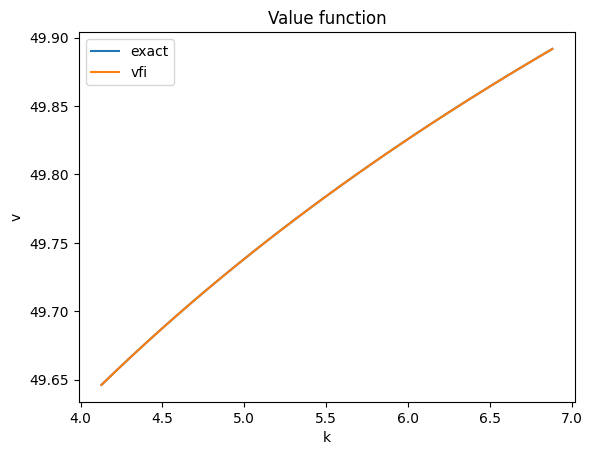

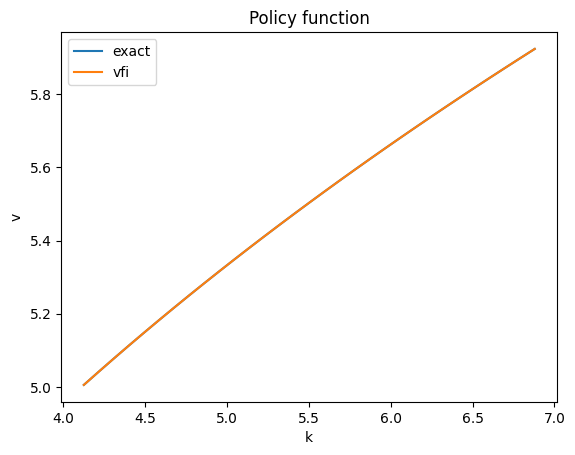

In [92]:
out_valu, out_poli = T(toler=1e-6, max_iter=10000, beta=0.95, gamma=1, alpha=0.33, delta=1, A=10, n=31)


Now, fix the code so that we can use CRRA, `gamma=2`

In [93]:
def Tw(toler, max_iter, beta, gamma, alpha, delta, A, n):

    V = np.ones(shape=(n,1))

    V_new = np.zeros(shape=(n,1))

    G_kp = np.zeros(shape=(n,1))

    k = create_grids(n, alpha, beta, delta, A)[0]

    iter = 1

    start_time = time.time()

    for iter in range(max_iter):

        for i, k_i in enumerate(k):

            def F(kp, k_i, V_interp):
            # Objective Function
            # Calculate consumption for each kp
                c = f(A, alpha, delta, k_i) - kp
                # c = max (f(A, alpha, delta, k_i) - kp, 1e-8)
                # Minimise the negative of the Bellman with interpolated v(kp)
                return -((u_new(c, gamma, beta) + beta * (V_interp(kp))**(1-gamma)))**(1/(1-gamma))
        
        # Interpolate the value function

            V_interp = interpolate.interp1d(np.squeeze(k), np.squeeze(V) , kind = 'cubic', fill_value = 'extrapolate')

            k_min = np.min(k) * 0.9

            k_max = f(A, alpha, delta, k[i]) + 1e-8

            dF_min = -1

            dF_max = 1

            # Check for corner solutions
            # If the derivative at kp at the lower bound is negative, it suggests that the objective function is decreasing as kp approaches the lower bound
            # This can happen if the policy implied by the objective function is to reduce kp further.
            # So, the algorithm sets kp_min to k_min, this implies that if the optimisation algorithm is in a situation
            # where it seems beneficial to reduce kp below k_min based on the objective function, the algorithm starts the search from k_min.
            # The idea is to handle scenarios where the objective function might suggest a corner solution at the lower bound. 
            # Setting kp_min to k_min provides a starting point for the optimisation algorithm.

            # While kp_min and kp_max are indeed set to k_min and k_max respectively, they are used as initial guesses for the minimisation algorithm. 
            # However, these initial guesses do not restrict the search space of the algorithm; 
            # the algorithm is still free to explore values within the bounds specified in the bounds parameter of minimize_scalar.

            kp_min = k_min if dF_min < 0 else None

            kp_max = k_max if dF_max > 0 else None

            # Since we pass args=(k_i, V_interp), minimize_scalar will search in the kp direction to minimise F.
            # That is, it will find consumption for each kp, and calculate the Bellman using V_interp(kp)
            # Result will be of type OptimizeResult
            # To find the value, we use -result.fun, and result.x is the optimal value of kp which minimises the objective function.
            # Minimise_scalar uses two-sided derivatives

            result = minimize_scalar(F, bounds=(kp_min, kp_max), args=(k_i, V_interp), method='bounded')

            G_kp[i] = result.x

            V_new[i] = -result.fun
        
        iter += 1

        error = np.abs(np.max(V_new - V))

        if iter == 1:
            print(f"Iteration {iter}, Max Error: {error}") 
        if iter % 25 == 0:
            print(f"Iteration {iter}, Max Error: {error}") 

        if np.max((V_new - V)) < toler:
            print(f"Converged in {iter} iterations")
            break

        V = np.copy(V_new)

    end_time = time.time() 
    execution_time = end_time - start_time 
    print(f"Execution time: {execution_time} seconds")

    # Plots

    plt.plot(k, V_interp(k), label='vfi')
    plt.xlabel('k')
    plt.ylabel("v")
    plt.title("Value function")
    plt.legend()
    plt.show()

    plt.plot(k, G_kp, label='vfi')
    plt.xlabel('k')
    plt.ylabel("v")
    plt.title("Policy function")
    plt.legend()
    plt.show()


    return V, G_kp            


Iteration 1, Max Error: 0.04899505141656646
Iteration 25, Max Error: 0.11347628253704034
Iteration 50, Max Error: 0.15467749910236872
Iteration 75, Max Error: 0.09777005950430784
Iteration 100, Max Error: 0.03678490213275509
Iteration 125, Max Error: 0.01120368794084392
Iteration 150, Max Error: 0.003191966346456354
Iteration 175, Max Error: 0.0008920636301432694
Iteration 200, Max Error: 0.0002479641614616668
Iteration 225, Max Error: 6.882237950556203e-05
Iteration 250, Max Error: 1.909366738139795e-05
Iteration 275, Max Error: 5.296619498551536e-06
Iteration 300, Max Error: 1.4692451149045382e-06
Converged in 308 iterations
Execution time: 11.428900957107544 seconds


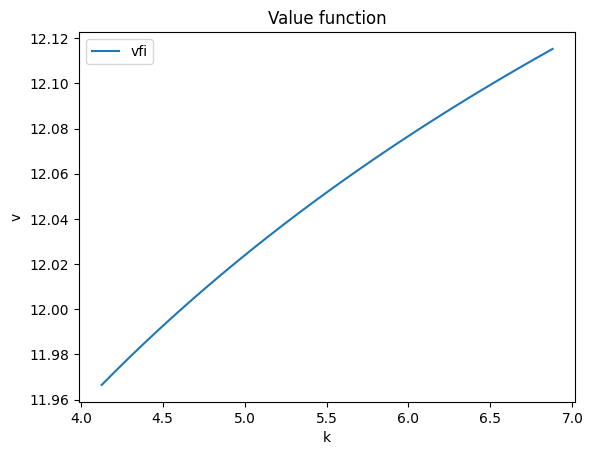

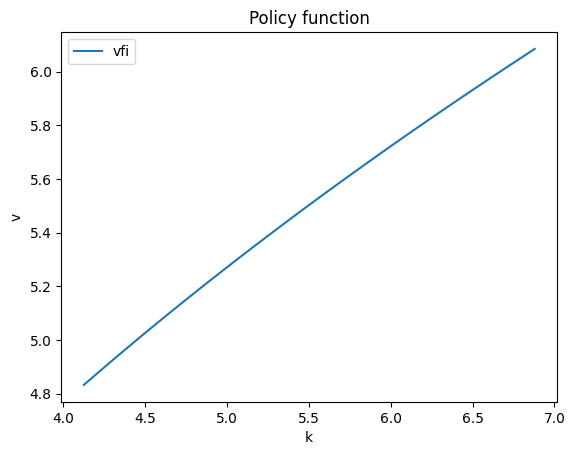

In [94]:
out_valu, out_poli = Tw(toler=1e-6, max_iter=10000, beta=0.95, gamma=2, alpha=0.33, delta=1, A=10, n=31)

In [108]:
def Tq(toler, max_iter, beta, gamma, alpha, delta, A, n):

    V = np.ones(shape=(n,1))

    V_new = np.zeros(shape=(n,1))

    G_kp = np.zeros(shape=(n,1))

    k = create_grids(n, alpha, beta, delta, A)[0]

    iter = 1

    start_time = time.time()

    for iter in range(max_iter):

        for i, k_i in enumerate(k):

            def F(kp, k_i, V_interp):
                c = f(A, alpha, delta, k_i) - kp
                return -((u(c, gamma) + beta * (V_interp(kp))))

            V_interp = interpolate.interp1d(np.squeeze(k), np.squeeze(V) , kind = 'cubic', fill_value = 'extrapolate')

            k_min = np.min(k) * 0.9

            k_max = f(A, alpha, delta, k[i]) + 1

            dF_min = -1

            dF_max = 1

            kp_min = k_min if dF_min < 0 else None

            kp_max = k_max if dF_max > 0 else None

            result = minimize_scalar(F, bounds=(kp_min, kp_max), args=(k_i, V_interp), method='bounded')

            G_kp[i] = result.x

            V_new[i] = -result.fun
        
        iter += 1

        error = np.abs(np.max(V_new - V))

        if iter == 1:
            print(f"Iteration {iter}, Max Error: {error}") 
        if iter % 25 == 0:
            print(f"Iteration {iter}, Max Error: {error}") 

        if np.max((V_new - V)) < toler:
            print(f"Converged in {iter} iterations")
            break

        V = np.copy(V_new)

    end_time = time.time() 
    execution_time = end_time - start_time 
    print(f"Execution time: {execution_time} seconds")

    # Plots

    plt.plot(k, V_interp(k), label='vfi')
    plt.xlabel('k')
    plt.ylabel("v")
    plt.title("Value function")
    plt.legend()
    plt.show()

    plt.plot(k, G_kp, label='vfi')
    plt.xlabel('k')
    plt.ylabel("v")
    plt.title("Policy function")
    plt.legend()
    plt.show()


    return V, G_kp  

Iteration 1, Max Error: 0.1158668448573712
Converged in 1 iterations
Execution time: 10.034451246261597 seconds


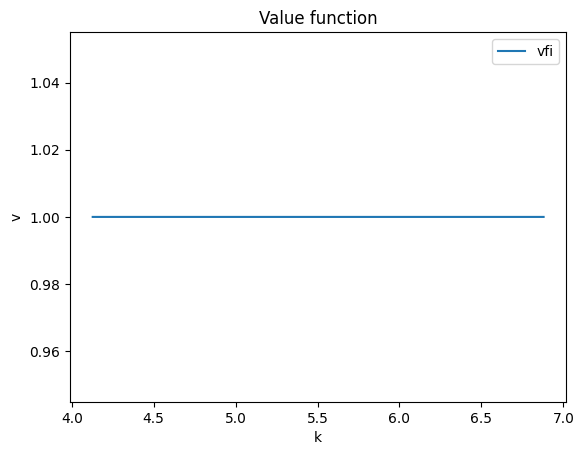

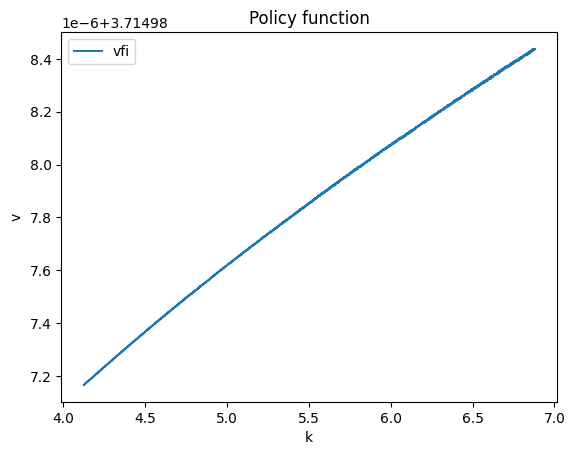

In [109]:
q_v, q_pol = Tq(toler=1e-6, max_iter=1000000, beta=0.95, gamma=2, alpha=0.33, delta=1, A=10, n=1)

# Now, let us start to add uncertainty to the model

First, I think it's a good idea to solve the model with shocks, and without interpolation.

In [151]:
def Tv_shocks_vector(delta, toler, max_iter, alpha, A, beta, n, gamma):
    # Start timing etc
    start_time = time.time()
    iter = 1
    error = toler+1
    # Create the grids
    k, k2, k3, k4 = create_grids(n, alpha, beta, delta, A)
    k = np.reshape(k, (len(k),1))
    # Initialise the markov process using the rouwenhorst method
    mc = qe.markov.approximation.rouwenhorst(n=15,rho=0.98,sigma=1,mu=3.0)
    # Get the values and transition matrix from the rouwenhorst method
    Z_A, Pi_A = mc.state_values, mc.P
    #print(Z_A)
    # Create Z_A_matrix of size (len(Z_A), len(k)).
    Z_A_matrix = np.meshgrid(Z_A,k)[0]
    k_matrix = np.meshgrid(k,Z_A)[0]
    k_matrix = np.repeat(k_matrix[np.newaxis, :, :], len(k), axis=0)
    # Create the matrix of A values. It stores all possible combinations of A and k. Size (len(A*exp(Z_A)), len(k))
    A_matrix = A * np.exp(Z_A_matrix)
    #print(A_matrix)
    #print(A_matrix.shape)
    # Now, create 3D k_matrix os shape (len(k), len(Z_A), len(k))
    #k_matrix = np.tile(k, (len(Z_A), 1, len(k))).transpose(1, 0, 2)
    #print(k_matrix.shape)
    A_matrix = A_matrix[:, :, np.newaxis]
    A_matrix = np.tile(A_matrix, (1, 1, 31))
    #print(A_matrix.shape)
    vmax_matrix =  np.zeros_like(k_matrix)
    v = np.zeros_like(vmax_matrix[:,:,:1])
    #print(v.shape)
    #vmax_matrix =  -np.inf * np.ones_like(k_matrix)
    #print(vmax_matrix.shape)
        # Policy matrix
    policy_matrix = np.zeros_like(k_matrix)
    while (toler<error) and (iter<max_iter):
        # Value matrix
        #vmax_matrix =  -np.inf * np.ones_like(k_matrix)
        #print(vmax_matrix.shape)
        # Policy matrix
        #policy_matrix = np.zeros_like(k_matrix)
        # Calculate consumption for all possible combinations of k and A
        c_matrix = f(A_matrix, alpha, delta, k_matrix) - k_matrix.transpose(2,1,0)
        #print(c_matrix)
        # Just check that it is of the same size as the previous matrices
        #print(c_matrix.shape)
        c_pos = np.where(c_matrix > 0, c_matrix, np.nan)
        #print(c_pos.shape)
        u_matrix = u(c_pos, gamma)
        ut = np.where(u_matrix == np.nan, -np.inf, u_matrix)
        #print(u.shape)
        # Expected value for a given shock today and capital stock tomorrow
        expected_future_value = beta * np.matmul(Pi_A, v)
        #exp_fut = expected_future_value.transpose(1,0,2)
        # Add the expected_future_value element-wise to u_matrix to form v_temp_matrix
        v_temp_matrix = ut + expected_future_value
        # Find the policy function
        max_indices = np.argmax(v_temp_matrix, axis = 2)

        # Update the value and policy functions
        vmax_matrix = np.max(v_temp_matrix, axis = 2, keepdims=True)
        policy_matrix = k_matrix[:,:,max_indices]
        # Calculate error
        error = np.max(np.abs(vmax_matrix - v))
        # Update value function
        
        v=np.copy(vmax_matrix)
        if iter == 1:
            print(f"Iteration {iter}, Max Error: {error}") 
        if iter % 10 == 0:
            print(f"Iteration {iter}, Max Error: {error}") 
        iter+=1
    if iter == max_iter:
        print("Failed to converge in max_iter iterations") 
    end_time = time.time() 
    execution_time = end_time - start_time 
    print(f"Execution time: {execution_time} seconds")
    # Return the value function and policy function. note that we maximise along axis 2 since that is the k' axis
    # Policy will be of size (len(k), len(Z_A), 1) where the final axis represents the actual policy at a given state
    return np.max(v, axis = 2), policy_matrix[:,:,np.argmax(v, axis = 2)] 

More information on the np.meshgrid() command and creating matrices rather than vectors.

Here's a bit more detail:

1. **State Spaces**: You have two state variables in your model: capital (\(k\)) and the stochastic productivity shock (\(A\)). Each of these has its own set of possible values.

2. **Meshgrid Creation**: `np.meshgrid()` takes these 1D arrays of possible values and creates a 2D grid where one axis represents the values of \(k\) and the other axis represents the values of the productivity shock (\(A\)). This grid is essentially a matrix where each element is a pair \((k_i, A_j)\).

    - `k_matrix`: A matrix where each row corresponds to a different value of \(k\), each column corresponds to a different value of the productivity shock (\(A\)).
    - `Z_A_matrix`: The transpose of `k_matrix`, each row corresponds to a different value of \(A\), each column corresponds to a different value of the productivity shock (\(k\))..

3. **Efficient Evaluation**: By creating these matrices, you can then evaluate functions like the production function (\(f\)) and consumption for all combinations of \(k\) and \(A\) without explicit nested loops. This is a key part of the vectorization process.

   - `f(A_matrix, alpha, delta, k_matrix)`: Evaluates the production function for all combinations of \(k\) and \(A\).
   - `u(c_matrix[valid_mask], gamma)`: Calculates utility for valid consumption values without the need for explicit loops.

4. **Vectorized Operations**: NumPy allows you to perform operations on entire arrays or matrices at once, which is much more efficient than using explicit loops. This is particularly important for large datasets where vectorized operations can significantly improve performance.

In summary, `np.meshgrid()` helps organize the state spaces into matrices, enabling efficient vectorized calculations for various functions, leading to improved computational performance.

Certainly! Let's break down what the matrix multiplication does in the context of your model.

Assumptions:
- `Pi_A` has dimensions (num_states, num_states), where num_states is the number of states in your Markov process.
- `vmax_matrix` has dimensions (len(k), len(Z_A), len(k)), representing the value function for each combination of current capital stock (`k`), current productivity shock (`Z_A`), and future capital stock (`k'`).

Explanation:

1. **Matrix Multiplication (`np.matmul`):**
   - For each joint state today (combination of current capital and productivity shock), `Pi_A` represents the probabilities of transitioning to each possible state tomorrow.
   - `vmax_matrix` contains the value function for each combination of current and future states.
   - The matrix multiplication computes the expected value of the future value function for each current state.

2. **Transpose Operation (`vmax_matrix.transpose(1, 0, 2)`):**
   - This transposition swaps the second and first axes of `vmax_matrix`. It is done to align the dimensions properly for matrix multiplication.

3. **Matrix Multiplication Result Transpose (`np.matmul(Pi_A, vmax_matrix.transpose(1, 0, 2)).transpose(1, 0, 2)`):**
   - After the matrix multiplication, the result is transposed back to the original shape.
   - The resulting matrix has dimensions (len(k), len(Z_A), len(k)), representing the expected future value for each combination of current capital and productivity shock.

In simple terms, each element `(i, j, l)` in the resulting matrix represents the expected future value for the combination of:
- Current capital stock (`k[i]`),
- Current productivity shock (`Z_A[j]`), and
- Future capital stock (`k[l]`).

Here's a conceptual breakdown:
\[ \text{{expected\_future\_value}}[i, j, l] = \sum_{m} \text{{Pi\_A}}[m, i] \times \text{{vmax\_matrix}}[j, m, l] \]

This calculation considers the probabilities of transitioning from the current state `m` to the future state `l`, weighted by the values in `vmax_matrix` for the given current and future states.

I hope this clarifies the concept! If you have any further questions or if anything is unclear, feel free to ask.

Yes, your understanding is correct. The element \(c_{i,j,k}\) of `c_matrix` represents the consumption for the \(i\)-th level of current capital (\(k_i\)), the \(j\)-th level of the productivity shock (\(Z_{A,j}\)), and the \(k\)-th level of future capital (\(k_k\)).

The formula for \(c_{i,j,k}\) is as follows:

\[c_{i,j,k} = A_j \cdot (k_i)^{\alpha} + (1 - \delta)k_i - k_k\]

The code you provided:

```python
c_matrix = f(A_matrix, alpha, delta, k_matrix) - k_matrix.transpose(2, 1, 0)
```

is correctly implementing this formula. It calculates the consumption for all possible combinations of \(k_i\), \(Z_{A,j}\), and \(k_k\), taking into account the productivity shock \(A_j\).

So, each element \(c_{i,j,k}\) of `c_matrix` is the result of the specified formula, considering the appropriate levels of current capital, productivity shock, and future capital.

If you have further questions or if there's anything else I can help you with, feel free to ask!

In [152]:
v_res, pol_res = Tv_shocks_vector(delta=1, toler=1e-5, max_iter=100000, alpha=0.3, A=10, beta=0.99, n=31, gamma=1)

C:\Users\bayle\AppData\Local\Temp\ipykernel_33752\2773227885.py:10: UserWarning: The API of rouwenhorst has changed from `rouwenhorst(n, ybar, sigma, rho)` to `rouwenhorst(n, rho, sigma, mu=0.)`. To find more details please visit: https://github.com/QuantEcon/QuantEcon.py/issues/663.
  mc = qe.markov.approximation.rouwenhorst(n=15,rho=0.98,sigma=1,mu=3.0)


Iteration 1, Max Error: 171.6385905368533
Iteration 10, Max Error: 153.93919107177658
Iteration 20, Max Error: 136.85066495846968
Iteration 30, Max Error: 122.01459219077515
Iteration 40, Max Error: 109.05414014814687
Iteration 50, Max Error: 97.67065734306016
Iteration 60, Max Error: 87.62519469132621
Iteration 70, Max Error: 78.7246661127192
Iteration 80, Max Error: 70.81145499872582
Iteration 90, Max Error: 63.75558295475639
Iteration 100, Max Error: 57.448786362991086
Iteration 110, Max Error: 51.80001577927396
Iteration 120, Max Error: 46.73199853665756
Iteration 130, Max Error: 42.17859768116614
Iteration 140, Max Error: 38.08276901278077
Iteration 150, Max Error: 34.394968829119534
Iteration 160, Max Error: 31.071902613983184
Iteration 170, Max Error: 28.075532810335062
Iteration 180, Max Error: 25.372284504102936
Iteration 190, Max Error: 22.932403196986343
Iteration 200, Max Error: 20.729430249677534
Iteration 210, Max Error: 18.739770056661655
Iteration 220, Max Error: 16.942